# Урок 4
Непрерывные случайные величины. Функция распределения и плотность распределения вероятностей. Равномерное и нормальное распределение. Центральная предельная теорема

Домашнее задание

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install scipy
# !pip install datetime

In [9]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings('ignore')

## Задача 1

О непрерывной равномерно распределённой случайной величине `B` известно, что её дисперсия равна 0.2. Можно ли найти правую границу величины `B` и её среднее значение зная, что левая граница равна 0.5? Если да, найдите их.

### Решение
В данном примере случайна величина распределена по-условию **равномерно**, поэтому D(X) = (b-a)^2/12, отсюда можно вычислить `b`.

А среднее значение - это ее мат.ожидание M(X) = (a+b)/2

In [3]:
D = 0.2
a = 0.5

b = a + math.sqrt(D * 12)
print(f'b = {b}')

M = (a + b) / 2
print(f'M(X) = {M}')

b = 2.049193338482967
M(X) = 1.2745966692414834


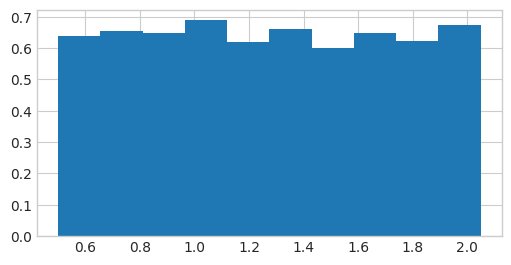

In [9]:
plt.figure(figsize=(6,3))
plt.hist(samples, density=True);

## Задача 2

Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

*Подсказка*. Найдите такое значение `scale`, для которого значение `cdf(x=1, loc=1.06, scale=scale)` близко к 0.05. Точности 0.0001 будет достаточно.

### Решение
Скорее всего распределение масс конфет является нормальным. 
- М(X) = 1.06
- P(1.0) = 0.05

In [1]:
# Дано
loc = 1.06

In [7]:
%%time

# мое решение
scale = 0
P = 0
while P <= 0.05:
    scale += 0.00001
    P = stats.norm.cdf(x=1, loc=loc, scale=scale) 
#     print(scale, P)
print(f'scale = {scale}')
print(f'P = {P}')

scale = 0.0364800000000005
P = 0.05001204583680406
Wall time: 628 ms


In [10]:
# решение из видео
scale = 0

for x in np.arange(0, 1, 0.00001):
    if abs(stats.norm.cdf(1, loc=loc, scale = x) - 0.05) < 0.0001:
        scale = x
        break

print(f'scale = {scale}')

scale = 0.036460000000000006


In [11]:
# Проверка
stats.norm.cdf(1, loc=loc, scale=scale)

0.049919046532665975

In [19]:
print('среднее квадратическое отклонение массы коробки =',scale)

среднее квадратическое отклонение массы коробки = 0.036460000000000006


In [23]:
# процент коробок, имеющих массу больше 1.1 кг.
# p = 1 - F(1.1)
print('Процент коробок, имеющих массу больше 1.1 кг. =', 1 - stats.norm.cdf(1.1, loc=loc, scale=scale))

Процент коробок, имеющих массу больше 1.1 кг. = 0.13630043457442875


## Задача 3
Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена **равномерно** в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

*Массой самой коробки можно пренебречь.*

### Решение.


$$\mu = n \cdot M), \:\: \sigma^2 = n \cdot D)$$

In [25]:
# Дано
n = 30  # кол-во конфет
a = 12 
b = 14

In [26]:
mu = 390
M = mu / n
M

13.0

In [33]:
M = (a + b) / 2
D = (b-a)**2 / 12
sigma = math.sqrt(n * D)
print(f'M = {M},\nD = {D},\nsigma = {sigma}')

M = 13.0,
D = 0.3333333333333333,
sigma = 3.1622776601683795


#### а) меньше 390 граммов, 

In [36]:
stats.norm(loc=mu, scale=sigma) \
    .cdf(390)

0.5

#### б) больше 395 граммов, 

In [37]:
1 - stats.norm(loc=mu, scale=sigma) \
    .cdf(395)

0.056923149003329065

#### в) от 380 до 400 граммов.

In [38]:
p1 = stats.norm(loc=mu, scale=sigma).cdf(400)
p2 = stats.norm(loc=mu, scale=sigma).cdf(380)

p1 - p2

0.9984345977419975